In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/all_commodities_data.csv')
X = data[['open', 'high', 'low', 'close', 'volume']]
y = data['close']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

In [ ]:
svm_regressor = SVR(kernel='rbf', C=100, epsilon=0.1, gamma='scale')
svm_regressor.fit(X_train_scaled, y_train)


SVR(C=100)

In [ ]:
y_pred_train = svm_regressor.predict(X_train_scaled)
y_pred_test = svm_regressor.predict(X_test_scaled)

# Evaluate the model
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
accuracy = svm_regressor.score(X_test_scaled, y_test)
print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)
print("Accuracy:", accuracy)


Training RMSE: 10.942407456278229
Testing RMSE: 10.19089920613095
Accuracy: 0.9997509738856296


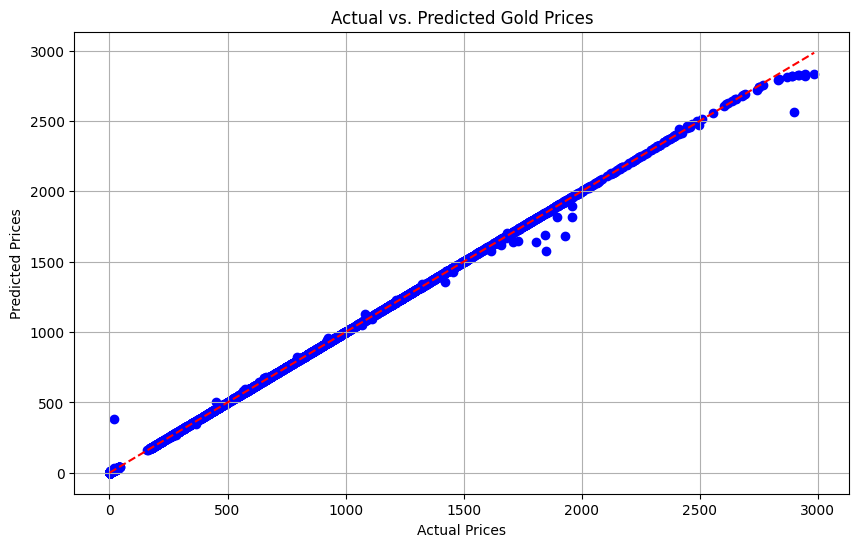

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], linestyle='--', color='red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Gold Prices')
plt.grid(True)
plt.show()

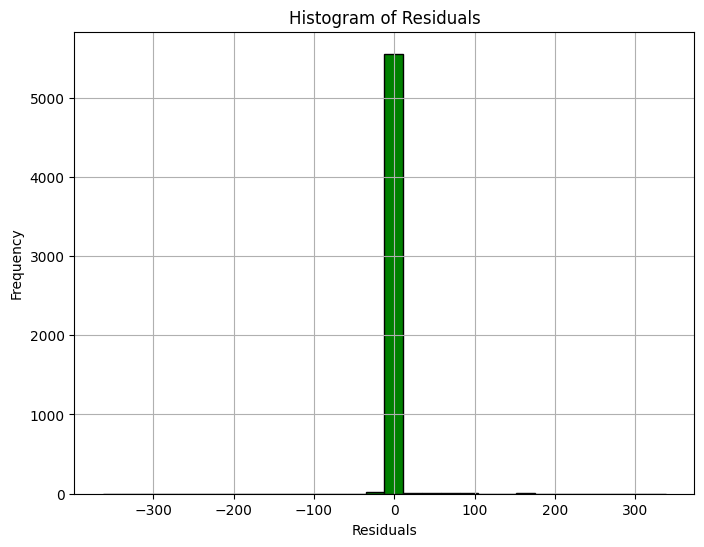

Accuracy: 0.9997509738856296
Predicted values for the testing set:
[315.74202524   2.98923173   3.63531892 ... 539.15780017   0.89697777
   2.84284852]


In [ ]:
residuals = y_test - y_pred_test
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, color='green', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.grid(True)
plt.show()

print("Accuracy:", accuracy)
print("Predicted values for the testing set:")
print(y_pred_test)
